In [1]:
# if use google colab, mount your drive

# from google.colab import drive
# drive.mount('/content/gdrive')

# dataset_path = F"/content/gdrive/My Drive/dsai_final/"

In [1]:
import glob
import os

In [2]:
glob.glob(os.path.join('..', '*.csv'))

['../uxp_full_data.csv',
 '../uxp_full_cls.csv',
 '../test.csv',
 '../uxp_10_percent_data.csv',
 '../uxp_10_percent_cls.csv']

# Read Training Data

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [4]:
# read training data
df = pd.read_csv('../uxp_full_cls.csv', index_col=0)

/home/jeff/anaconda3/envs/work/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
# get number of user and product
N_USER = np.max(df['user_id'])
N_PRODUCT = np.max(df['product_id'])

N_USER, N_PRODUCT

(206209, 49688)

In [6]:
df.head()

,user_id,product_id,uxp_reorder_ratio,u_total_bought_product,u_avg_bought_p_per_order,uxp_order_ratio,p_tot_bought,p_reorder_ratio,eval_set,order_id,reordered
0,1,196,1.000000,70,6.363636,1.000000,37298,0.777843,train,1187899,1
1,1,10258,1.000000,70,6.363636,0.909091,2050,0.715610,train,1187899,1
2,1,10326,0.142857,70,6.363636,0.090909,5947,0.653439,train,1187899,0
3,1,12427,0.909091,70,6.363636,0.909091,6697,0.740182,train,1187899,1
4,1,13032,0.400000,70,6.363636,0.363636,3904,0.661117,train,1187899,1


In [7]:
df.tail()

,user_id,product_id,uxp_reorder_ratio,u_total_bought_product,u_avg_bought_p_per_order,uxp_order_ratio,p_tot_bought,p_reorder_ratio,eval_set,order_id,reordered
13863741,206209,43961,0.272727,137,9.785714,0.214286,57831,0.632567,train,272231,1
13863742,206209,44325,0.125000,137,9.785714,0.071429,3643,0.403788,train,272231,0
13863743,206209,48370,0.250000,137,9.785714,0.071429,4118,0.701068,train,272231,0
13863744,206209,48697,0.125000,137,9.785714,0.071429,10151,0.359078,train,272231,0
13863745,206209,48742,0.250000,137,9.785714,0.142857,1798,0.498331,train,272231,1


In [8]:
df = df.drop(['p_tot_bought', 'p_reorder_ratio'], axis=1)
df.head()

,user_id,product_id,uxp_reorder_ratio,u_total_bought_product,u_avg_bought_p_per_order,uxp_order_ratio,eval_set,order_id,reordered
0,1,196,1.000000,70,6.363636,1.000000,train,1187899,1
1,1,10258,1.000000,70,6.363636,0.909091,train,1187899,1
2,1,10326,0.142857,70,6.363636,0.090909,train,1187899,0
3,1,12427,0.909091,70,6.363636,0.909091,train,1187899,1
4,1,13032,0.400000,70,6.363636,0.363636,train,1187899,1


## Normalize feature

In [9]:
from sklearn.preprocessing import normalize

In [10]:
# normalize df feature
norm_df = pd.DataFrame(normalize(np.array([df['uxp_reorder_ratio'], df['u_total_bought_product'], df['u_avg_bought_p_per_order'], df['uxp_order_ratio']])).T)

In [11]:
norm_df.head()

,0,1,2,3
0,0.000668,0.000043,0.000121,0.001239
1,0.000668,0.000043,0.000121,0.001126
2,0.000095,0.000043,0.000121,0.000113
3,0.000607,0.000043,0.000121,0.001126
4,0.000267,0.000043,0.000121,0.000450


In [12]:
df['uxp_reorder_ratio'] = norm_df[0]
df['u_total_bought_product'] = norm_df[1]
df['u_avg_bought_p_per_order'] = norm_df[2]
df['uxp_order_ratio'] = norm_df[3]

In [59]:
df.head()

,user_id,product_id,uxp_reorder_ratio,u_total_bought_product,u_avg_bought_p_per_order,uxp_order_ratio,eval_set,order_id,reordered
0,1,196,0.000668,0.000043,0.000121,0.001239,train,1187899,1
1,1,10258,0.000668,0.000043,0.000121,0.001126,train,1187899,1
2,1,10326,0.000095,0.000043,0.000121,0.000113,train,1187899,0
3,1,12427,0.000607,0.000043,0.000121,0.001126,train,1187899,1
4,1,13032,0.000267,0.000043,0.000121,0.000450,train,1187899,1


# try drop some features

In [14]:
# drop some features
# df = df.drop(['user_id', 'product_id'], axis=1)

# XGBoost

In [15]:
# !pip install xgboost

In [60]:
import xgboost as xgb

In [61]:
train = df[df['eval_set'] == 'train'].copy()

train.head()

,user_id,product_id,uxp_reorder_ratio,u_total_bought_product,u_avg_bought_p_per_order,uxp_order_ratio,eval_set,order_id,reordered
0,1,196,0.000668,0.000043,0.000121,0.001239,train,1187899,1
1,1,10258,0.000668,0.000043,0.000121,0.001126,train,1187899,1
2,1,10326,0.000095,0.000043,0.000121,0.000113,train,1187899,0
3,1,12427,0.000607,0.000043,0.000121,0.001126,train,1187899,1
4,1,13032,0.000267,0.000043,0.000121,0.000450,train,1187899,1


In [62]:
X_train, y_train = train.drop(['eval_set', 'user_id', 'product_id', 'order_id', 'reordered'], axis=1), train.reordered

In [63]:
X_train.head()

,uxp_reorder_ratio,u_total_bought_product,u_avg_bought_p_per_order,uxp_order_ratio
0,0.000668,0.000043,0.000121,0.001239
1,0.000668,0.000043,0.000121,0.001126
2,0.000095,0.000043,0.000121,0.000113
3,0.000607,0.000043,0.000121,0.001126
4,0.000267,0.000043,0.000121,0.000450


In [64]:
y_train.head()

0    1
1    1
2    0
3    1
4    1
Name: reordered, dtype: int64

In [65]:
# xgb paramter
parameters = {'eval_metric':'logloss', 
              'max_depth':'10', 
              'colsample_bytree':'0.3',
              'subsample':'0.75'
             }

In [66]:
# classifier
xgbc = xgb.XGBClassifier(objective='binary:logistic', parameters=parameters, num_boost_round=100)

In [67]:
# train model
model = xgbc.fit(X_train, y_train)

/home/jeff/anaconda3/envs/work/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:27:29] WARNING: ../src/learner.cc:573: 
Parameters: { "num_boost_round", "parameters" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:27:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

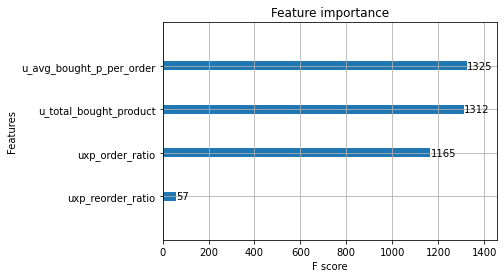

In [68]:
import matplotlib.pylab as plt
from matplotlib import pyplot

xgb.plot_importance(model)

In [29]:
# model.get_xgb_params()

### Parameter search

In [42]:
from sklearn.model_selection import GridSearchCV

# parameter grid
param_grid = {"max_depth":[5,10],
            "colsample_bytree":[0.3,0.4]}  

xgbc = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', num_boost_round=10)
                         
gridsearch = GridSearchCV(xgbc, param_grid, cv=3, verbose=2, n_jobs=1)

# start grid search
model = gridsearch.fit(X_train, y_train)

# Delete X_train , y_train
del [X_train, y_train]

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/home/jeff/anaconda3/envs/work/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:48] WARNING: ../src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END ..................colsample_bytree=0.3, max_depth=5; total time= 2.1min


/home/jeff/anaconda3/envs/work/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:39:56] WARNING: ../src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END ..................colsample_bytree=0.3, max_depth=5; total time= 2.2min


/home/jeff/anaconda3/envs/work/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:42:06] WARNING: ../src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END ..................colsample_bytree=0.3, max_depth=5; total time= 2.1min


/home/jeff/anaconda3/envs/work/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:15] WARNING: ../src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END .................colsample_bytree=0.3, max_depth=10; total time= 3.6min


/home/jeff/anaconda3/envs/work/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:47:49] WARNING: ../src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END .................colsample_bytree=0.3, max_depth=10; total time= 3.6min


/home/jeff/anaconda3/envs/work/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:51:23] WARNING: ../src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END .................colsample_bytree=0.3, max_depth=10; total time= 3.6min


/home/jeff/anaconda3/envs/work/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:54:58] WARNING: ../src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END ..................colsample_bytree=0.4, max_depth=5; total time= 2.1min


/home/jeff/anaconda3/envs/work/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:57:06] WARNING: ../src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END ..................colsample_bytree=0.4, max_depth=5; total time= 2.2min


/home/jeff/anaconda3/envs/work/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:59:16] WARNING: ../src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END ..................colsample_bytree=0.4, max_depth=5; total time= 2.1min


/home/jeff/anaconda3/envs/work/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:01:25] WARNING: ../src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END .................colsample_bytree=0.4, max_depth=10; total time= 3.6min


/home/jeff/anaconda3/envs/work/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:58] WARNING: ../src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END .................colsample_bytree=0.4, max_depth=10; total time= 3.6min


/home/jeff/anaconda3/envs/work/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:34] WARNING: ../src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END .................colsample_bytree=0.4, max_depth=10; total time= 3.6min


/home/jeff/anaconda3/envs/work/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:08] WARNING: ../src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [43]:
# best parameter
gridsearch.best_params_

{'colsample_bytree': 0.3, 'max_depth': 10}

In [44]:
model = gridsearch.best_estimator_

# Predict

In [69]:
test = df[df['eval_set'] == 'test'].copy()

test = test.drop(['eval_set', 'order_id', 'reordered'], axis=1)

test.head()

,user_id,product_id,uxp_reorder_ratio,u_total_bought_product,u_avg_bought_p_per_order,uxp_order_ratio
140,3,248,0.000061,0.000054,0.000139,0.000103
141,3,1005,0.000223,0.000054,0.000139,0.000103
142,3,1819,0.000223,0.000054,0.000139,0.000310
143,3,7503,0.000067,0.000054,0.000139,0.000103
144,3,8021,0.000061,0.000054,0.000139,0.000103


In [70]:
test_pred = (model.predict_proba(test.drop(['user_id', 'product_id'], axis=1))[:,1] >= 0.21).astype(int)
test_pred[0:20] #display the first 20 predictions of the numpy array

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [71]:
submit = df[df['eval_set'] == 'test'].copy()

submit['predict'] = test_pred

submit.head()

,user_id,product_id,uxp_reorder_ratio,u_total_bought_product,u_avg_bought_p_per_order,uxp_order_ratio,eval_set,order_id,reordered,predict
140,3,248,0.000061,0.000054,0.000139,0.000103,test,2774568,0,0
141,3,1005,0.000223,0.000054,0.000139,0.000103,test,2774568,0,0
142,3,1819,0.000223,0.000054,0.000139,0.000310,test,2774568,1,1
143,3,7503,0.000067,0.000054,0.000139,0.000103,test,2774568,0,0
144,3,8021,0.000061,0.000054,0.000139,0.000103,test,2774568,0,0


In [72]:
# see the difference after predict
submit[submit.reordered != submit.predict]

,user_id,product_id,uxp_reorder_ratio,u_total_bought_product,u_avg_bought_p_per_order,uxp_order_ratio,eval_set,order_id,reordered,predict
218,6,8424,0.000668,0.000009,0.000088,0.000413,test,1528013,0,1
219,6,10644,0.000334,0.000009,0.000088,0.000413,test,1528013,0,1
220,6,11068,0.000334,0.000009,0.000088,0.000413,test,1528013,0,1
221,6,20323,0.000334,0.000009,0.000088,0.000413,test,1528013,0,1
223,6,25659,0.000668,0.000009,0.000088,0.000413,test,1528013,0,1
...,...,...,...,...,...,...,...,...,...,...
13861489,206179,43195,0.000668,0.000027,0.000278,0.000413,test,2900626,0,1
13861490,206179,44697,0.000334,0.000027,0.000278,0.000413,test,2900626,0,1
13861491,206179,46522,0.000334,0.000027,0.000278,0.000413,test,2900626,0,1
13861492,206179,47734,0.000334,0.000027,0.000278,0.000413,test,2900626,0,1


# Make output

In [73]:
# sanity check
# check if order_id is 75000
# because output should have 75000 row (according to Kaggle competition page)

len(set(submit['order_id']))

75000

In [74]:
# order_id : products
submit_map = {}

In [75]:
# first give every order id a empty basket
for od_id in set(submit['order_id']):
    submit_map[od_id] = []

In [76]:
# now we get the dataset of reordered
reordered_test_df = submit[submit['reordered'] == 1]

reordered_test_df.head()

,user_id,product_id,uxp_reorder_ratio,u_total_bought_product,u_avg_bought_p_per_order,uxp_order_ratio,eval_set,order_id,reordered,predict
142,3,1819,0.000223,0.000054,0.000139,0.000310,test,2774568,1,1
145,3,9387,0.000278,0.000054,0.000139,0.000516,test,2774568,1,1
147,3,14992,0.000191,0.000054,0.000139,0.000206,test,2774568,1,1
149,3,16797,0.000167,0.000054,0.000139,0.000310,test,2774568,1,1
150,3,16965,0.000148,0.000054,0.000139,0.000206,test,2774568,1,1


In [77]:
from tqdm import tqdm

In [78]:
# put reordered item in each submit_order_id basket
for row in tqdm(reordered_test_df.iloc):
    submit_map[row.order_id].append(row.product_id)

1934118it [04:28, 7197.70it/s]


In [79]:
f = open('submit_xgb.csv', 'w')

f.write('order_id,products\n')

for i in tqdm(submit_map.items()):
    f.write('{},'.format(i[0]))
    
    # if order basket is empty
    if len(i[1]) == 0:
        f.write('None\n')
    
    else:
        FIRST = True
        for p in i[1]:
            if FIRST:
                FIRST = False
                f.write('{}'.format(p))
            else:
                f.write(' {}'.format(p))
        f.write('\n')
        
f.close()

100%|██████████| 75000/75000 [00:00<00:00, 77532.28it/s]
